In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
liwc_data = pd.read_csv("data/liwc+mfd2-results.csv")
topic_data = pd.read_csv("data/topics.csv")[["id","topic_distribution", 
                                             "dominant_topic",
                                             "prob_topic"]]
engineered_data_mfd = pd.read_csv("datavis/engineered_data.csv")[['id', 'Care_total', 'Fairness_total', 'Loyalty_total',
       'Authority_total', 'Sanctity_total', 'Virtue_total', 'Vice_total',
       'Foundations_total_score', 'Subreddit']]

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_2554/809542910.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  liwc_data = pd.read_csv("data/liwc+mfd2-results.csv")
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_2554/809542910.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  engineered_data_mfd = pd.read_csv("datavis/engineered_data.csv")[['id', 'Care_total', 'Fairness_total', 'Loyalty_total',


In [21]:
#keep only self improvement data
engineered_data_selfimp = engineered_data_mfd[engineered_data_mfd.Subreddit == "selfimprovement"]

#drop subreddit column
engineered_data_selfimp.drop("Subreddit", axis=1, inplace=True)

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_2554/3377472956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineered_data_selfimp.drop("Subreddit", axis=1, inplace=True)


Meged (LIWC + MFD)

In [22]:
merged_alldata = liwc_data.merge(engineered_data_selfimp, "inner", "id")

Merged (LIWC + MFD + Topics)

In [26]:
merged_with_topics = merged_alldata.merge(topic_data, "inner", "id")

#Function to improve readibility of topic data
def change_value(value):
    return f"Topic {int(np.round(value, 0))}"

# Apply the function to the column
merged_with_topics['dominant_topic'] = merged_with_topics['dominant_topic'].apply(change_value)

### Calculate correlation for all data (without filtering those not assigned to topics)

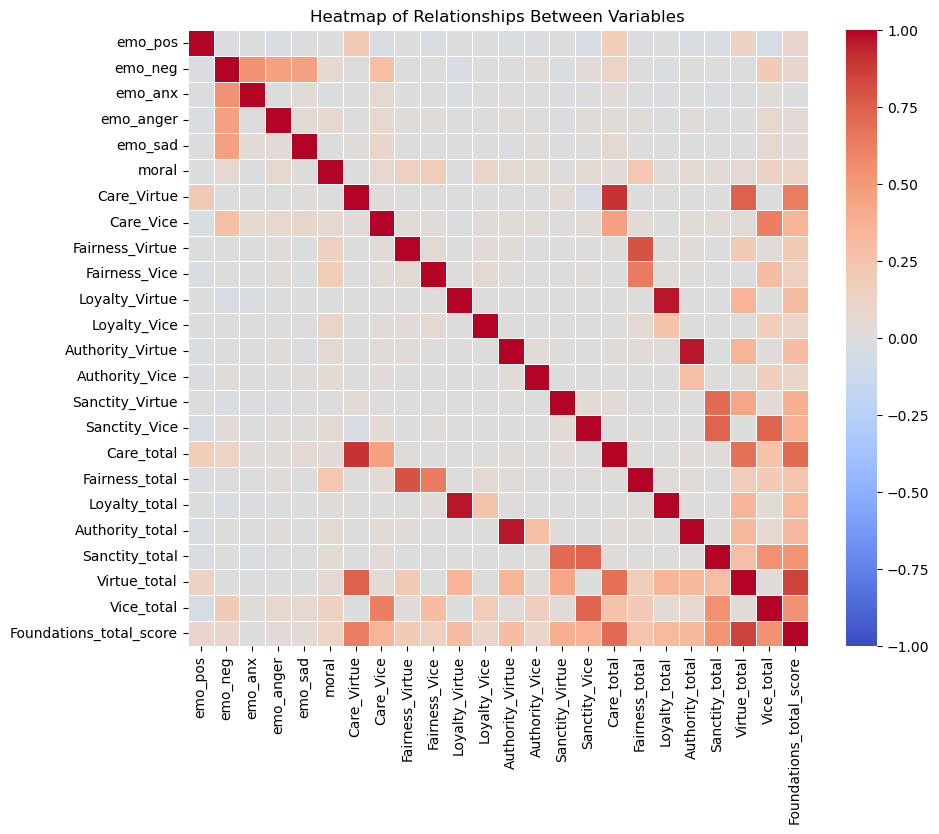

In [24]:
cols = merged_alldata[['emo_pos', 'emo_neg', 'emo_anx', 'emo_anger',
       'emo_sad', 'moral', 'Care_Virtue', 'Care_Vice',
       'Fairness_Virtue', 'Fairness_Vice', 'Loyalty_Virtue', 'Loyalty_Vice',
       'Authority_Virtue', 'Authority_Vice', 'Sanctity_Virtue',
       'Sanctity_Vice', 
       'Care_total', 'Fairness_total', 'Loyalty_total', 'Authority_total',
       'Sanctity_total', 'Virtue_total', 'Vice_total',
       'Foundations_total_score']]

# Calculate the correlation matrix
corr = cols.corr()

# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5, fmt=".2f", vmin=-1, vmax=1, cbar=True)

# Display the plot
plt.title("Heatmap of Relationships Between Variables")
plt.show()

#Save for analysis in Tableau
# Convert the correlation matrix to long format
corr_long = corr.stack().reset_index()
corr_long.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_long.to_csv("outputs/correlation_matrix_alldata.csv")

### Calculate correlations by subsets of topics

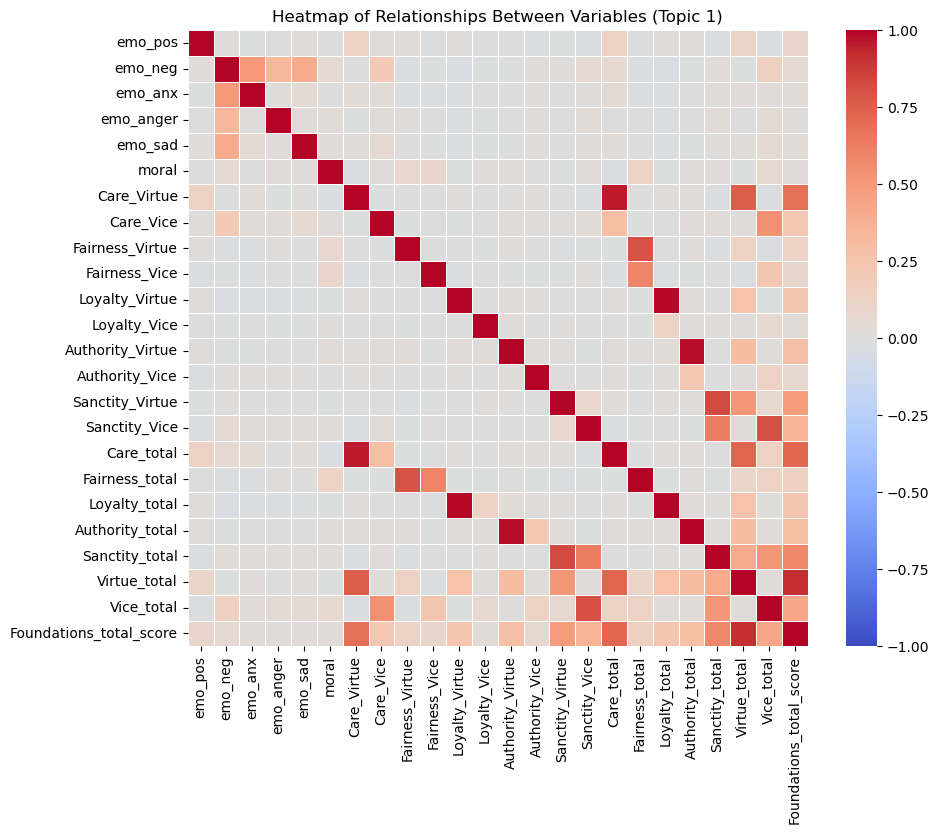

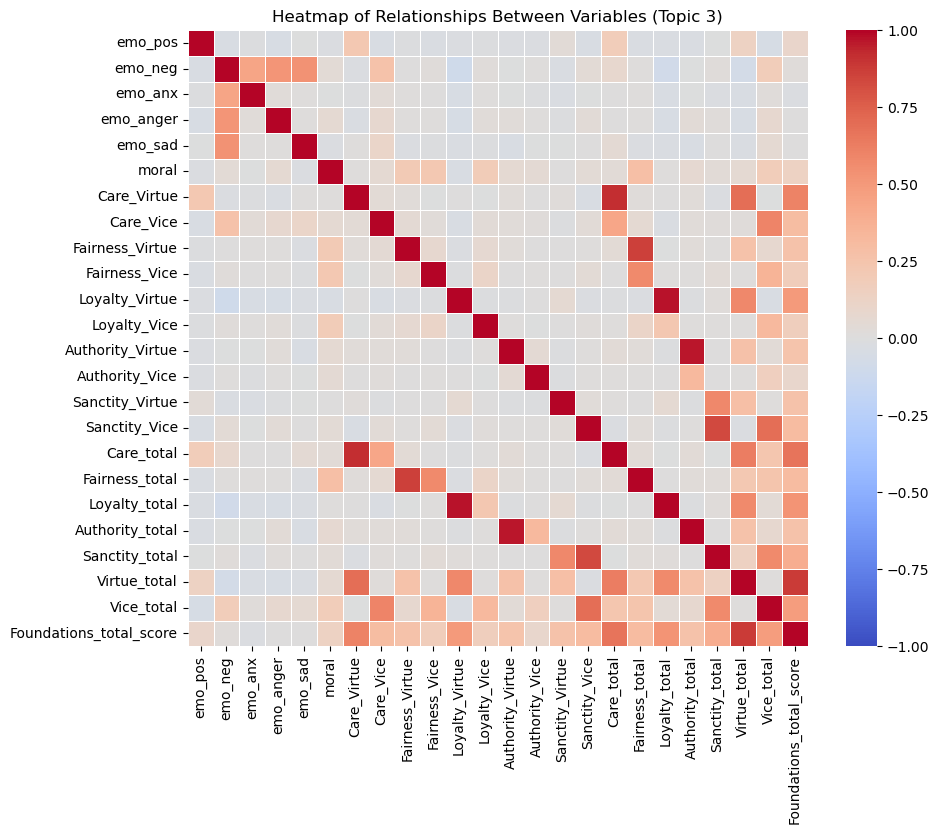

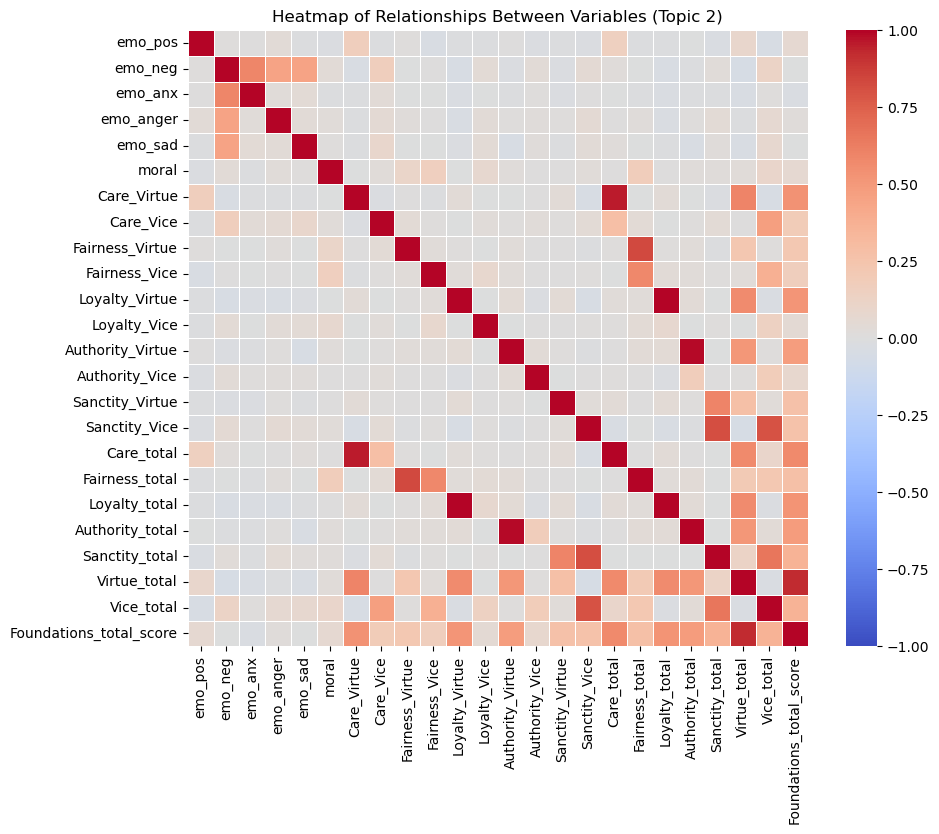

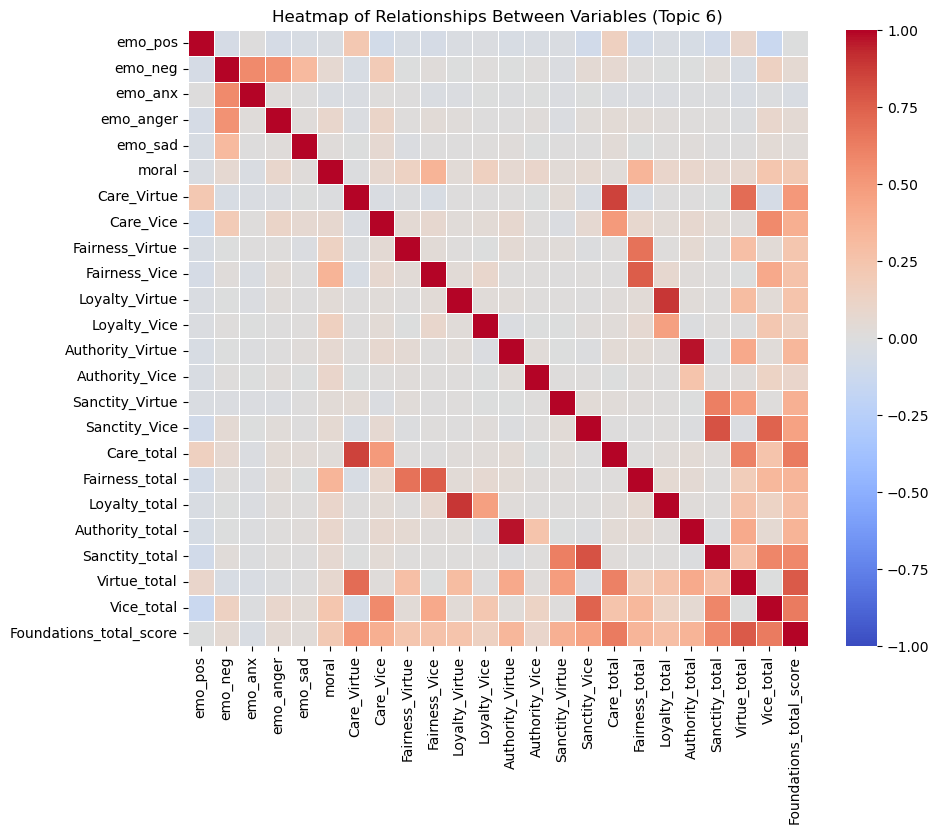

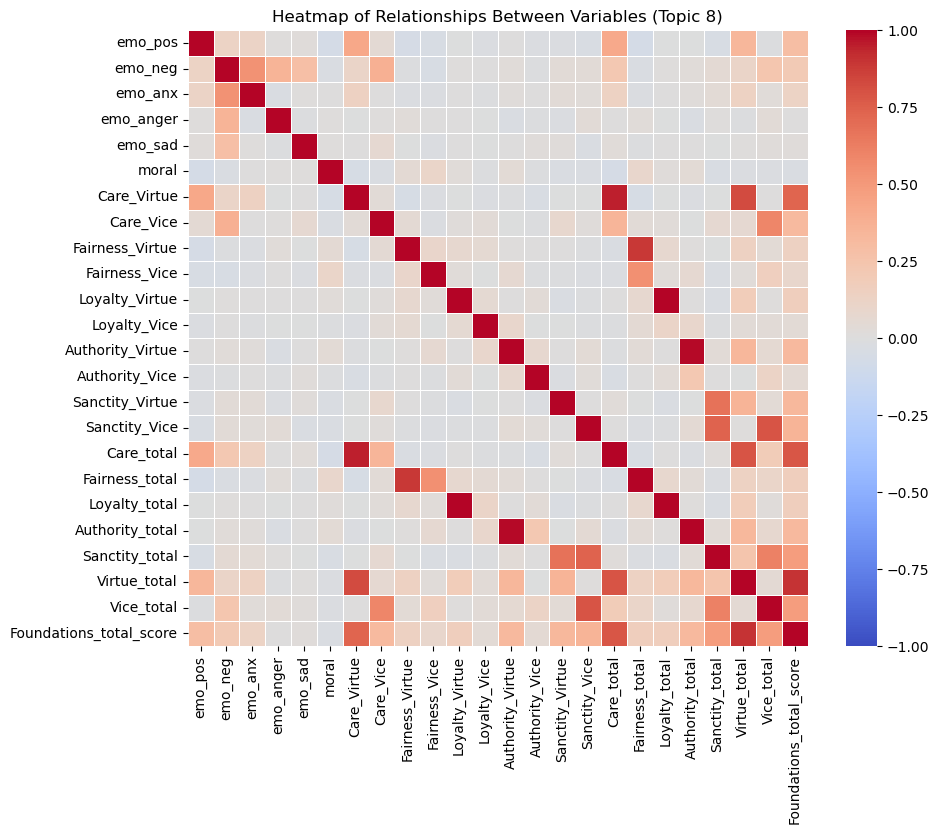

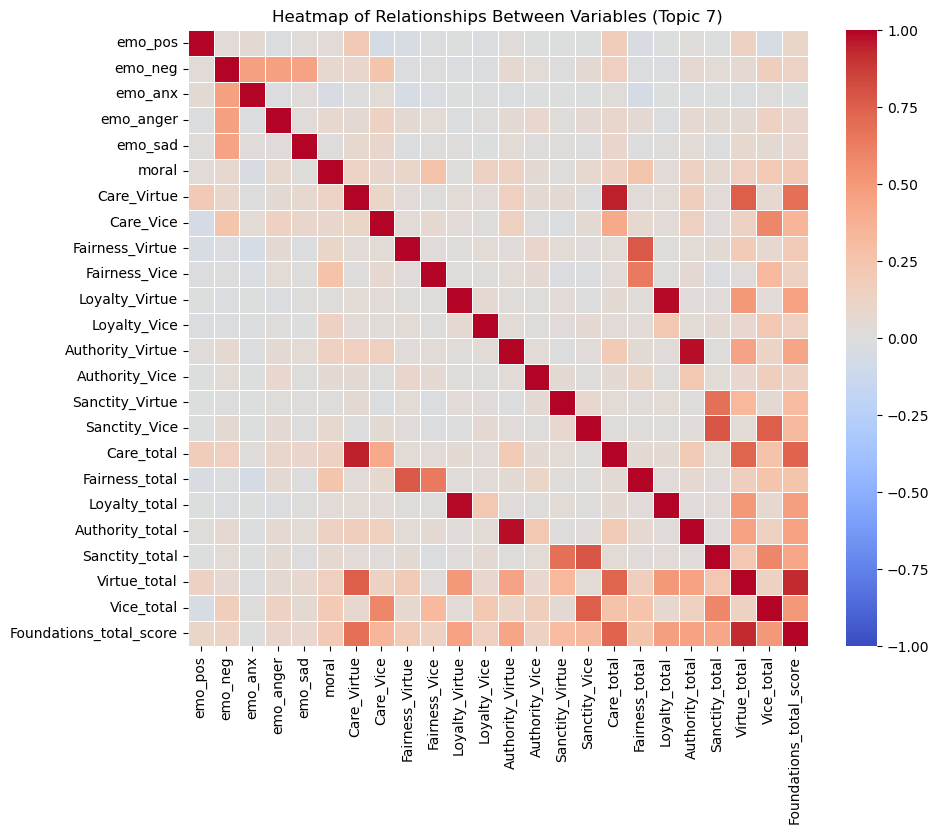

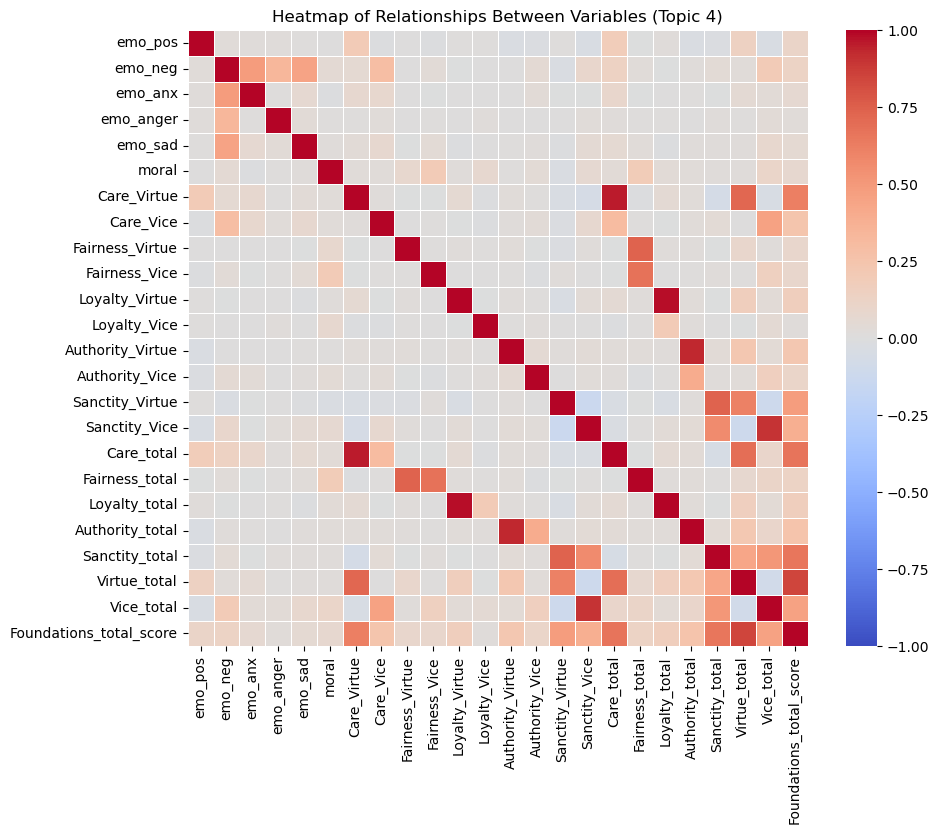

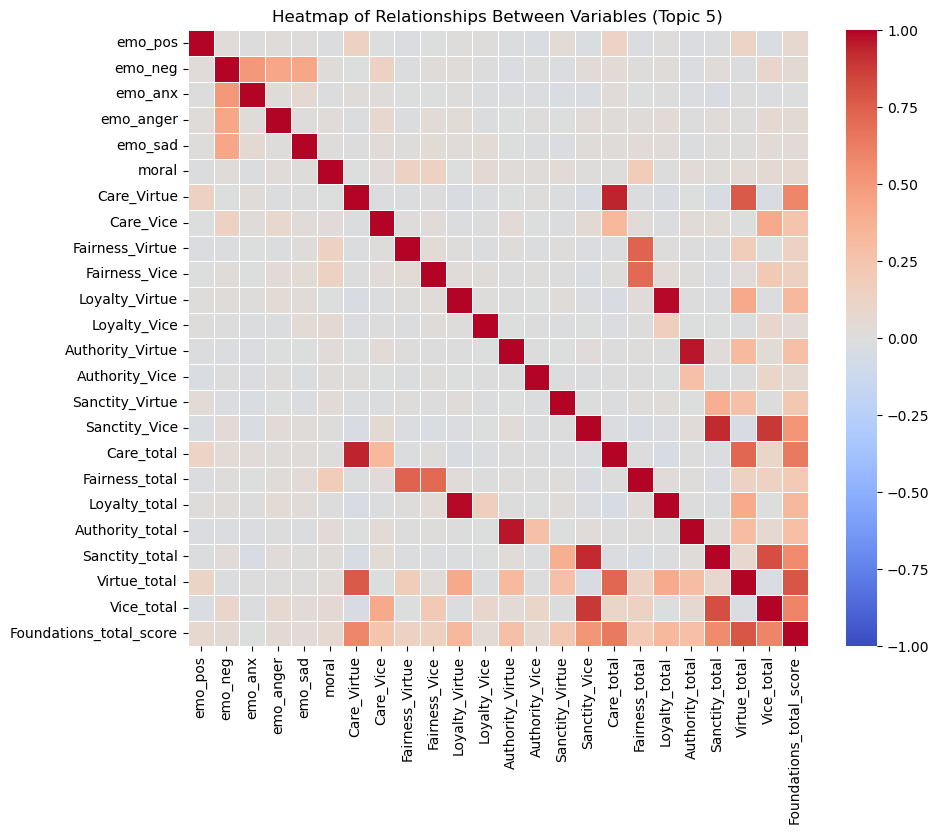

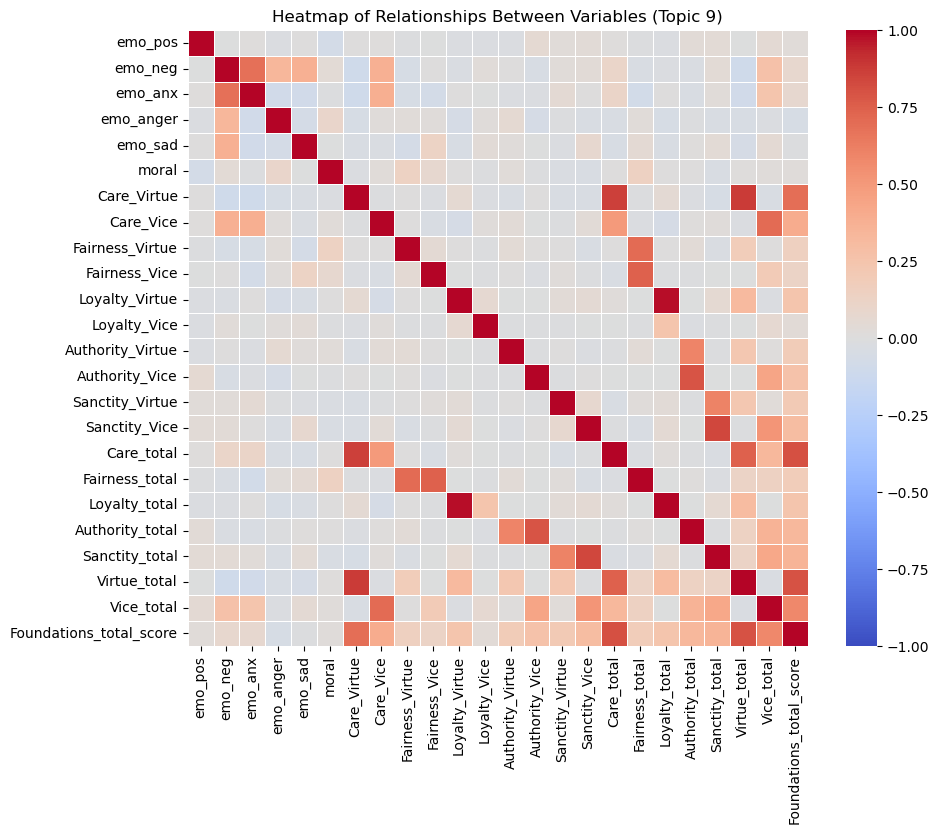

In [30]:
# Select columns to analyze
cols = ['emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'moral', 
        'Care_Virtue', 'Care_Vice', 'Fairness_Virtue', 'Fairness_Vice', 
        'Loyalty_Virtue', 'Loyalty_Vice', 'Authority_Virtue', 'Authority_Vice', 
        'Sanctity_Virtue', 'Sanctity_Vice', 'Care_total', 'Fairness_total', 
        'Loyalty_total', 'Authority_total', 'Sanctity_total', 'Virtue_total', 
        'Vice_total', 'Foundations_total_score']

# Iterate through topic
for topic in merged_with_topics['dominant_topic'].unique():
    # Filter the df for the current topic
    topic_df = merged_with_topics[merged_with_topics['dominant_topic'] == topic][cols]
    
    # Calculate the correlation matrix
    corr = topic_df.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5, fmt=".2f", vmin=-1, vmax=1, cbar=True)
    plt.title(f"Heatmap of Relationships Between Variables ({topic})")
    plt.show()

    # Convert the correlation matrix to long format and save it
    corr_long = corr.stack().reset_index()
    corr_long.columns = ['Variable 1', 'Variable 2', 'Correlation']
    corr_long.to_csv(f"outputs/correlation_matrix_{topic}.csv", index=False)
